<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


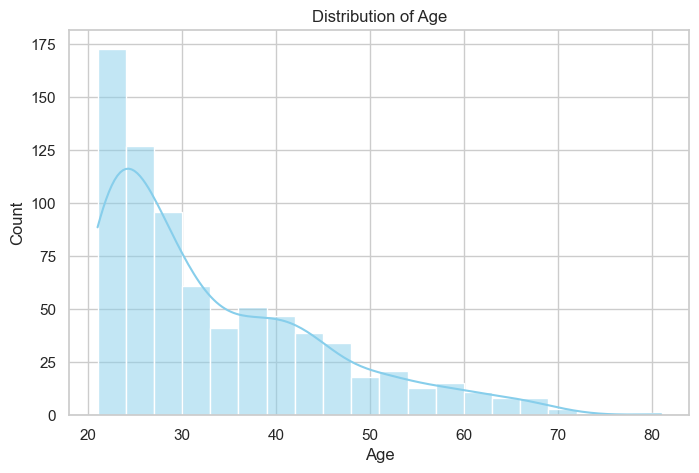

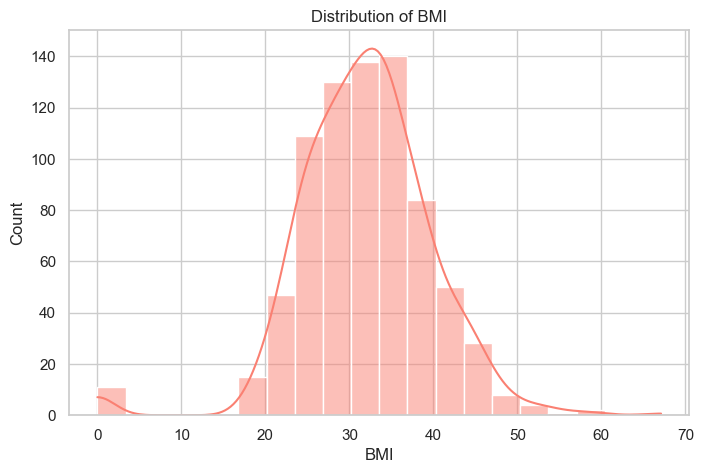

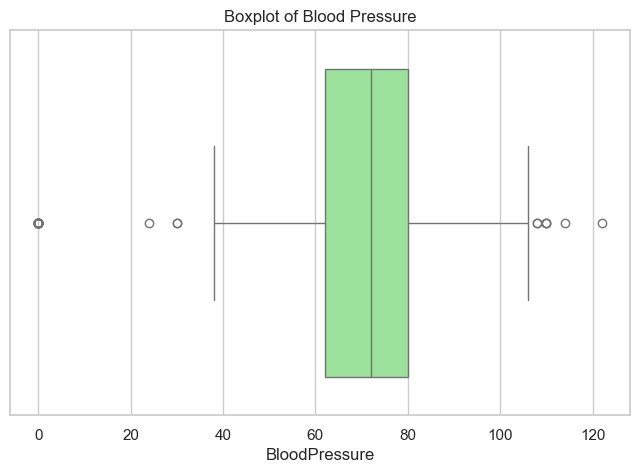

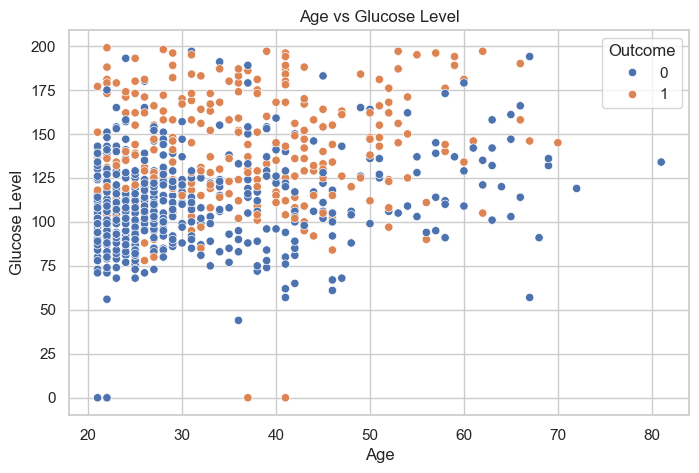

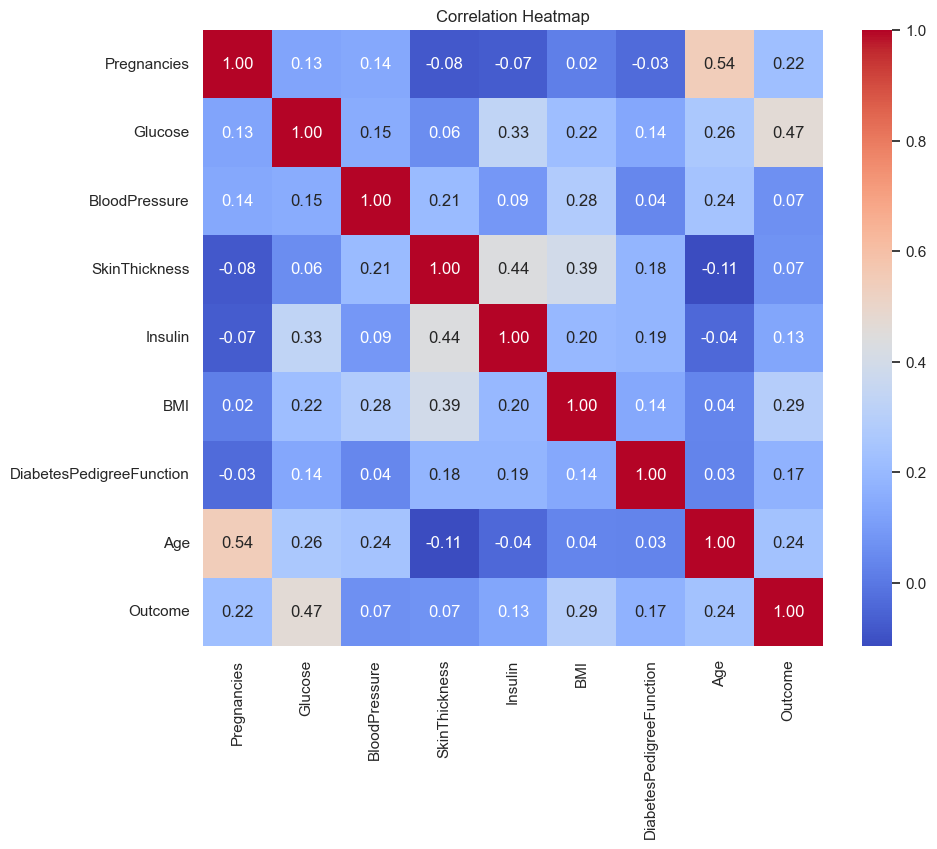

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15388\2901363271.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='pastel')


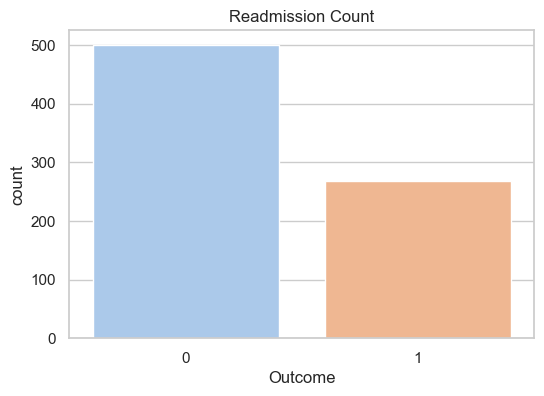

C:\Users\sudarshan\AppData\Local\Temp\ipykernel_15388\2901363271.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='Set2')


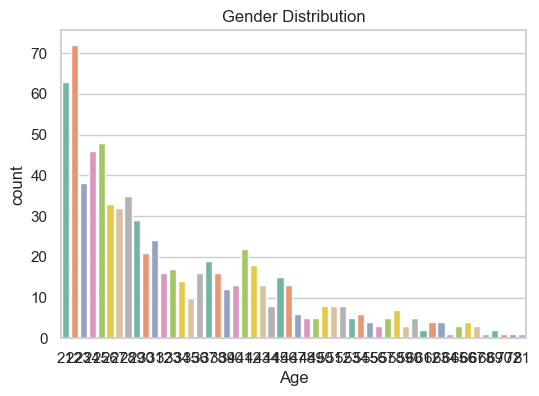

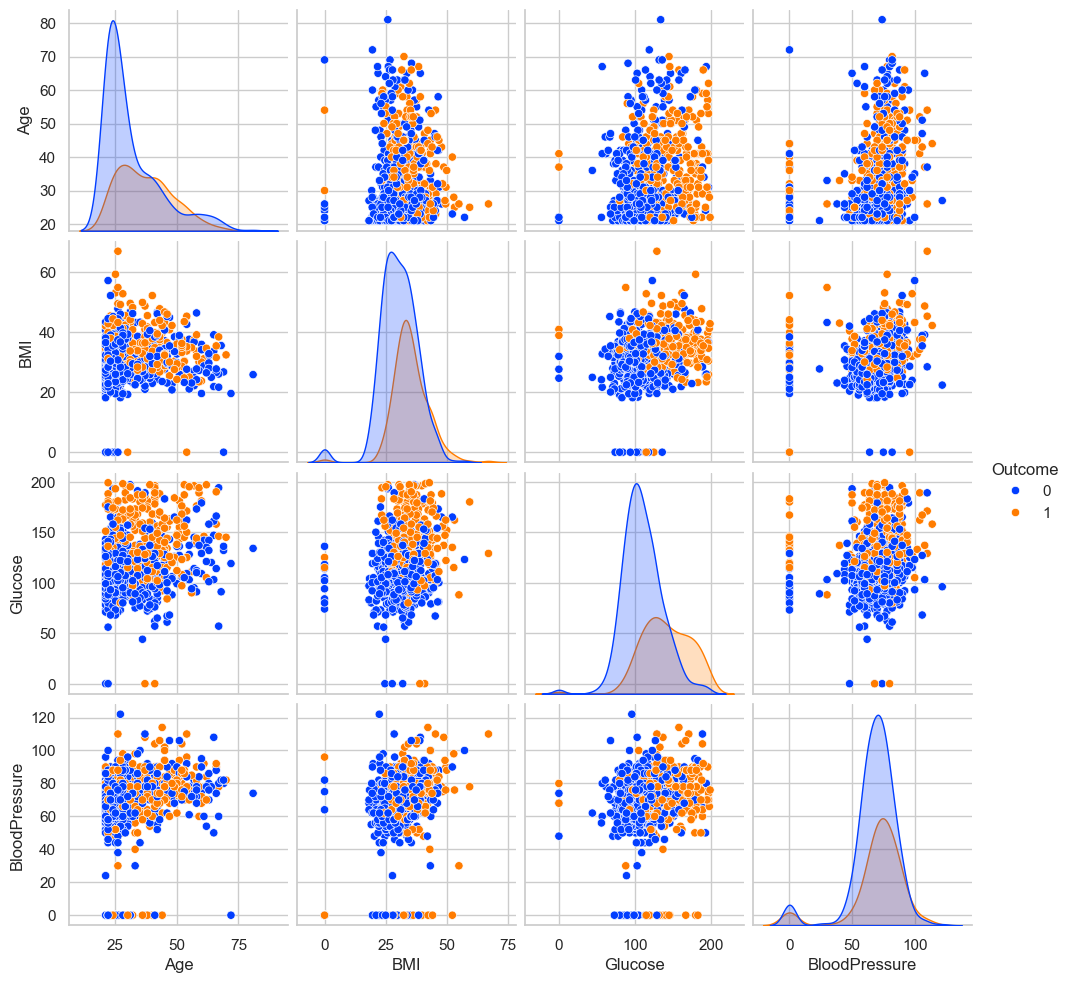

Top 5 age groups by readmission:
 Outcome     0     1  total
Age                       
22       61.0  11.0   72.0
21       58.0   5.0   63.0
25       34.0  14.0   48.0
24       38.0   8.0   46.0
23       31.0   7.0   38.0


In [6]:
# Experiment 12: Visual Analytics for Healthcare Data
# Jupyter Notebook by: Sudarshan
# Date: ...

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization aesthetics
sns.set(style='whitegrid')

# 2. Load Dataset
DATA_PATH = 'diabetes.csv'  # replace with your dataset path
df = pd.read_csv(DATA_PATH)

# Quick view of data
df.head()
df.info()
df.describe()

# 3. Data Cleaning (if necessary)
# Check for missing values
print(df.isnull().sum())

# For simplicity, drop rows with missing values (or you can fill them)
df = df.dropna()

# 4. Univariate Analysis
# Histogram - Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Histogram - Distribution of BMI
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=20, kde=True, color='salmon')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# Boxplot - Blood Pressure
plt.figure(figsize=(8,5))
sns.boxplot(x='BloodPressure', data=df, color='lightgreen')
plt.title("Boxplot of Blood Pressure")
plt.show()

# 5. Bivariate Analysis
# Scatter plot - Age vs Glucose Level
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title("Age vs Glucose Level")
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# 6. Categorical Analysis
# Count plot - Readmission status
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title("Readmission Count")
plt.show()

# Count plot - Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Age', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

# 7. Pairplot for selected variables
selected_columns = ['Age', 'BMI', 'Glucose', 'BloodPressure', 'Outcome']
sns.pairplot(df[selected_columns], hue='Outcome', palette='bright')
plt.show()

# 8. Insights
# Example: top 5 age groups with highest readmission
age_readmit = df.groupby('Age')['Outcome'].value_counts().unstack().fillna(0)
age_readmit['total'] = age_readmit.sum(axis=1)
age_readmit = age_readmit.sort_values('total', ascending=False)
print("Top 5 age groups by readmission:\n", age_readmit.head(5))

# 9. Save cleaned dataset for further analysis
df.to_csv("diabetes_cleaned.csv", index=False)
